第4章

# NumPy基础：数组和矢量计算

NumPy的部分功能如下：

    ·nadarray，一个具有矢量算术运算和复杂广播能力的快速且节省空间的多维数组

    ·用于对整组数据进行快速运算的标准数学函数（无需编写循环）

    ·用于读写磁盘数据的工具以及用于操作内存映射文件的工具

    ·线性代数、随机数生成以及傅里叶变换功能

    ·用于集成由C、C++、Fortran等语言编写的代码的工具

对于大部分数据分析应用而言，最主要的功能主要集中在：

    ·用于数据整理和清理、子集构造和过滤、转换等快速的矢量化数组运算。

    ·常用的数组算法，如排序、唯一化、集合运算等。
    
    ·高效的描述统计和数据聚合/摘要运算。
    
    ·用于异构数据集的合并/连接运算的数据对弃和关系型数据运算。
    
    ·将条件逻辑表述为数组表达式（而不是带有if-elif-els分支的循环）
    
    ·数据的分组运算（聚合、转换、函数应用等）第五章进行详细讲解。
    

----

## NumPy的ndarray：一种多维数组对象

NumPy最重要的一个特点就是其N维数组对象（即ndarray），该对象是一个快速而灵活的大数据集容器。可以利用这种数组对整块数据执行一些数学运算，其语法跟标量元素之间的运算一样

In [168]:
import numpy as np

ndarray是一个通用的同构数据多维容器，也就是，其中所有元素都必须是相同类型的。每一个数组都有一个shape（一个表示各纬度大小的元组）和一个dtype（一个用于说明数组数据类型的对象）：

data.shape 与 data.dtype

-----

### 创建ndarry

创建数组最简单的办法就是使用array函数，它接受一切序列型的对象（包括其他数组），然后产生一个新的含有传入数据的NumPy数组。以一个列表的转换为例

In [3]:
import numpy as np

In [4]:
data1 = [6,7.5,8,0,1]

In [5]:
arr1 = np.array(data1)

In [6]:
arr1

array([6. , 7.5, 8. , 0. , 1. ])

嵌套序列（比如由一组等长列表组成的列表）将会被转换成一个多维数组：

In [7]:
data2 = [[1,2,3,4],[5,6,7,8]]

In [8]:
arr2 = np.array(data2)

In [9]:
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [10]:
arr2.ndim

2

In [11]:
arr2.shape

(2, 4)

In [14]:
arr2.dtype
arr1.dtype

dtype('float64')

注：除非显式说明，np.array会尝试为新建的这一个数组推断出一个较为合适的数据类型，如存储在上面的dtype对象中。

除了np.array外，还有一些函数可以新建组。比如zeros和ones分别可以创建指定长度或形状的全0或全1数组。empty可以创建一个没有任何具体值的数组。

In [16]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [19]:
np.empty((2,3,4))

array([[[4.67296746e-307, 1.69121096e-306, 7.56595733e-307,
         1.42413555e-306],
        [1.78019082e-306, 1.37959740e-306, 6.23057349e-307,
         1.02360935e-306],
        [1.69120416e-306, 1.78022342e-306, 6.23058028e-307,
         1.06811422e-306]],

       [[1.39071445e-307, 8.01097889e-307, 1.78020169e-306,
         7.56601165e-307],
        [1.02359984e-306, 1.15710088e-306, 6.23056330e-307,
         9.34600284e-307],
        [8.45602762e-307, 1.11260619e-306, 1.60219035e-306,
         2.56765117e-312]]])

empty 返回的都是未初始化的垃圾值

arrange是Python内置函数range的数组版:

In [20]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

----

### ndarry的数据类型

dtype（数据类型）是一个特殊的对象，它含有ndarray将一块内存解释为特定数据类型所需要的信息：

In [22]:
arr1 = np.array([(1,2,3)],dtype = np.float64)

In [23]:
arr2 = np.array([1,2,3],dtype=np.int32)

In [24]:
arr1.dtype

dtype('float64')

In [25]:
arr2.dtype

dtype('int32')

#### dtype是NumPy如此强大和灵活的原因之一。多数情况下，它们直接映射到相应的机器表示，这使得“读写磁盘上的二进制数据流”以及“集成低级语言代码”（如C、Fortran）等工作变得简单。数值型dtype的命名方式相同：一个类型名（如float或int），后面跟一个用于表示各元素位长的数字。标准的双精度浮点值（即Python中的float对象）需要占用8字节（64位），因此表示为float64

可以通过ndarray的astype方法显式地转换其dtype：

例子一：将整数转换为浮点数

In [26]:
arr = np.array([1,2,3,4,5]
            )

In [28]:
arr.dtype

dtype('int32')

In [29]:
float_arr = arr.astype(np.float64)

In [31]:
float_arr.dtype

dtype('float64')

In [32]:
float_arr

array([1., 2., 3., 4., 5.])

例子二：将浮点数转换成整数

In [52]:
arr = np.array([3.7,-1.2,-2.6,0.5,12.9,10.1])

In [53]:
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [54]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [55]:
arr.astype(np.int32).dtype 

dtype('int32')

In [56]:
arr #并没有在存储方式上改变

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [64]:
arr3 = np.array([3.7,-1.2,-2.6,0.5,12.9,10.1],dtype=np.int32)

In [65]:
arr3

array([ 3, -1, -2,  0, 12, 10])

#### 如果某字符串数组表示的全是数字，也可以用astype将其转换成数值形式：

In [80]:
numberic_strings = np.array(['1.25','-9.6','42'],dtype=np.string_)

In [86]:
a=numberic_strings.astype(float)

In [85]:
a.astype(int)

array([ 1, -9, 42])

numberic_strings.astype(int)
#报错原因，某一个值无法转换成int值

    数组的dtype还有另外一个用法：

In [91]:
int_array = np.arange(10)

In [93]:
calibers = np.array([.22,.270,.357,.380,.44,.50],dtype = np.float64)

In [94]:
int_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [95]:
calibers

array([0.22 , 0.27 , 0.357, 0.38 , 0.44 , 0.5  ])

In [96]:
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

以数组B的数据类型（B.dtype)来转换数组A的数据类型 

------

### 数组和标量之间的运算

数组很重要，因为它使我们不用编写循环即可以对数据执行批量运算。这通常叫做矢量化（vectorization）。大小相等的数组之间的任何算数运算都会将运算应用到元素级：

In [101]:
arr = np.array([[1.,2.,3.],[4.,5.,6.]])

In [102]:
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [103]:
arr*arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [104]:
arr**0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [105]:
1/arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

#### 不同数组之间的运算叫做广播（broadcasting）第12章会讲到

-----

### 基本的索引与切片

第一，一维数组
    
    Numpy数组的索引是一个内容丰富的主题，因为选取数据子集或单个元素的方式有很多。一维数组很简单。从表面看，它们跟python列表功能差不多

In [111]:
arr = np.arange(1,10)

In [112]:
arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [113]:
arr[6]

7

In [114]:
arr[5:8]

array([6, 7, 8])

In [115]:
arr[5:8] =12

In [116]:
arr

array([ 1,  2,  3,  4,  5, 12, 12, 12,  9])

当一个标量值赋给一个切片时（arr【5：8】=12），该值会自动广播到整个选区。跟列表最重要的区别在于，数组切片是原始数组的视图。这意味着数据不会被复制，视图上的任何修改都会直接反映到源数组上。

In [118]:
arr_slice = arr[5:8]

In [119]:
arr_slice[1]= 12345

In [120]:
arr

array([    1,     2,     3,     4,     5,    12, 12345,    12,     9])

In [121]:
arr_slice[:]=64

In [122]:
arr

array([ 1,  2,  3,  4,  5, 64, 64, 64,  9])

#### 注，如果想要得到的是ndarray切片的一份副本而非视图，就需要显式地进行复制操作，如使用copy（）函数，例如arr[5:8].copy（）

In [125]:
arr_copy=arr[5:8].copy()

In [126]:
arr_copy[2]=35

In [127]:
arr

array([ 1,  2,  3,  4,  5, 64, 64, 64,  9])

In [128]:
arr_copy

array([64, 64, 35])

 第二，高维数组，如二维数组
     
     各索引位置上的元素不再是标量而是一维数组：

In [130]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [131]:
arr2d[2]

array([7, 8, 9])

In [133]:
arr2d[2][0]

7

In [134]:
arr2d[2,0]

7

在多维数组中，如果省略了后面的索引，则返回对象会是一个维度低一点的ndarray（它含有高一级维度上的所有数据）

In [146]:
arr3d = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])

In [147]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [148]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [149]:
old_values= arr3d[0].copy()

In [153]:
old_values

array([[1, 2, 3],
       [4, 5, 6]])

In [150]:
arr3d[0]=42

In [151]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [154]:
arr3d[0] = old_values

In [155]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [156]:
arr3d[1,0]

array([7, 8, 9])

-----

### 切片索引


ndarray的切片语法与Python列表这样的一维对象差不多:

In [157]:
arr[1:6]

array([ 2,  3,  4,  5, 64])

高维度对象的花样比较多，可以在一个或多个轴上进行切片，也可以跟着整数索引混合使用。对于上面的两个二位组：

In [158]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [159]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [160]:
arr2d[:2,1:]

array([[2, 3],
       [5, 6]])

In [161]:
arr2d[:2,:1]

array([[1],
       [4]])

In [162]:
arr2d[1,:2]

array([4, 5])

In [163]:
arr2d[2,:1
    ]

array([7])

In [164]:
arr2d[:2,1:]

array([[2, 3],
       [5, 6]])

In [165]:
arr2d[:2,1:]=1

In [166]:
arr2d

array([[1, 1, 1],
       [4, 1, 1],
       [7, 8, 9]])

----

### 布尔型索引

假设我们有一个用于存储数据的数组以及一个存储姓名的数组（含有重复项），首先这里先使用numpy.random 中randn函数生成一些正态分布的随机数据。

In [171]:
names=np.array(['Bob','Joe','Wil','Job','Bob','Joe','Joe'])

In [173]:
from numpy import random

In [180]:
data = random.randn(7,4)


In [181]:
names

array(['Bob', 'Joe', 'Wil', 'Job', 'Bob', 'Joe', 'Joe'], dtype='<U3')

In [183]:
data

array([[ 1.19342196, -0.34006903,  0.58527039, -0.99019883],
       [-0.48576916,  0.00347159, -1.3903184 , -0.95711066],
       [ 0.11523118,  1.08454143,  0.12539112,  0.54425664],
       [ 0.18982072,  0.85617644, -0.07717565,  0.01692715],
       [ 1.76157814,  1.00868065,  0.10579993,  1.13108229],
       [-1.30399877,  0.63471102, -0.52106062, -1.12853975],
       [-2.52137549, -0.70780839, -0.00395702, -0.70063039]])

假设每一个名字都对应data数组中的一行，而我们想要选出对应名字"Bob"的所有行。跟算术运算一样，数组的比较运算（如==）也是矢量化的。因此对于names和字符串中的“Bob”的比较运算将会产生出一个布尔数组：


In [185]:
names == 'Bob'

array([ True, False, False, False,  True, False, False])

In [186]:
data[names=='Bob']

array([[ 1.19342196, -0.34006903,  0.58527039, -0.99019883],
       [ 1.76157814,  1.00868065,  0.10579993,  1.13108229]])

布尔型数组的长度必须跟索引的轴长度一致。此外，还可以将布尔型数组跟切片、整数（或整数序列，稍后将对此进行详细讲解）混合使用

In [189]:
data [names=='Bob',2:]

array([[ 0.58527039, -0.99019883],
       [ 0.10579993,  1.13108229]])

In [192]:
names !='Bob'

array([False,  True,  True,  True, False,  True,  True])

In [195]:
data[(names !='Bob')]

array([[-0.48576916,  0.00347159, -1.3903184 , -0.95711066],
       [ 0.11523118,  1.08454143,  0.12539112,  0.54425664],
       [ 0.18982072,  0.85617644, -0.07717565,  0.01692715],
       [-1.30399877,  0.63471102, -0.52106062, -1.12853975],
       [-2.52137549, -0.70780839, -0.00395702, -0.70063039]])

布尔算术运算符：!不等于，&和，|或

In [200]:
mask = (names =='Bob')|(names =="Wil")

In [201]:
mask

array([ True, False,  True, False,  True, False, False])

In [202]:
data[mask]

array([[ 1.19342196, -0.34006903,  0.58527039, -0.99019883],
       [ 0.11523118,  1.08454143,  0.12539112,  0.54425664],
       [ 1.76157814,  1.00868065,  0.10579993,  1.13108229]])

In [203]:
data

array([[ 1.19342196, -0.34006903,  0.58527039, -0.99019883],
       [-0.48576916,  0.00347159, -1.3903184 , -0.95711066],
       [ 0.11523118,  1.08454143,  0.12539112,  0.54425664],
       [ 0.18982072,  0.85617644, -0.07717565,  0.01692715],
       [ 1.76157814,  1.00868065,  0.10579993,  1.13108229],
       [-1.30399877,  0.63471102, -0.52106062, -1.12853975],
       [-2.52137549, -0.70780839, -0.00395702, -0.70063039]])

通过布尔型索引选取的数据，总是创建副本

为了将data中所有的复制都设置未0，我们需要：

In [204]:
data[data<0] =0

In [205]:
data

array([[1.19342196, 0.        , 0.58527039, 0.        ],
       [0.        , 0.00347159, 0.        , 0.        ],
       [0.11523118, 1.08454143, 0.12539112, 0.54425664],
       [0.18982072, 0.85617644, 0.        , 0.01692715],
       [1.76157814, 1.00868065, 0.10579993, 1.13108229],
       [0.        , 0.63471102, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [206]:
data[names !="Joe"] =1

In [207]:
data

array([[1.        , 1.        , 1.        , 1.        ],
       [0.        , 0.00347159, 0.        , 0.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [0.        , 0.63471102, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

---

### 花式索引

花式索引（Fancy indexing）是一个NumPy术语，它是指利用整数数组及逆行索引。假设有一个8*4的数组

In [211]:
arr =np.empty((8,4))

In [213]:
for i in range(8):
    arr[i] = i

In [214]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [215]:
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [216]:
arr[[-3,-1,-8]]

array([[5., 5., 5., 5.],
       [7., 7., 7., 7.],
       [0., 0., 0., 0.]])

一次性传入多个索引数组会有一点特别。它返回的是一个一维数组，其中的元素对应各个索引元组：

In [217]:
arr =np.arange(32).reshape((8,4))

In [218]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [219]:
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

In [220]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [221]:
arr[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

使用np.ix_函数，可以将两个一维整数数组转换成为一个用于选取方形区域的索引器,后面的【0，3，1，2】是下一个列表内的排序

In [228]:
arr[np.ix_([1,5,7,2],[0,3,1,2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [229]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

----

### 数组转置和轴对换

转置（transpose）是重塑的一种特殊形式，它返回的是源数据的视图（不会进行任何复制操作）。数组不仅有transpose方法，它还有一个特殊的T属性：

In [250]:
arr = np.arange(15).reshape((3,5))

In [251]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [242]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

在进行矩阵计算时，经常需要用到该操作，比如利用np.dot计算矩阵内积X^TX:

In [245]:
arr = np.random.randn(6,3)

In [246]:
arr

array([[-0.37143205, -0.9863946 , -0.69570537],
       [-1.39106531,  0.25169255,  0.19419517],
       [ 0.85874461,  0.75743057, -0.77709146],
       [-1.34933023, -1.54588238,  0.57860119],
       [-1.10398451,  1.10457565,  1.20774744],
       [ 0.09181958,  1.88856697,  0.57380147]])

In [247]:
np.dot(arr.T,arr)

array([[ 5.85837148,  1.70657606, -2.74042633],
       [ 1.70657606,  8.7865494 ,  1.6697862 ],
       [-2.74042633,  1.6697862 ,  3.24827019]])


对于高维组，transpose需要得到由轴编号组成的元组才能对这些轴进行转置：原始轴为（0，1，2）

In [393]:
arr=np.arange(16).reshape((2,2,4))

In [394]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [406]:
arr.transpose((2,0,1))

array([[[ 0,  4],
        [ 8, 12]],

       [[ 1,  5],
        [ 9, 13]],

       [[ 2,  6],
        [10, 14]],

       [[ 3,  7],
        [11, 15]]])

简单的转置可以用.T，就是进行轴对换。ndarray还有一个swapaxes方法，它需要接受一对轴编号：、

In [259]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [284]:
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

----

### 通用函数：快速的元素级数组函数

通用函数（ufun）是一种对ndarray中的数据执行元素级运算的函数。许多的ufunc都是简单的元素级变体，如sqrt与exp

In [285]:
arr = np.arange(10)

In [287]:
np.sqrt(arr)  #sqrt指元素的平方根

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [289]:
np.exp(arr) #指各元素的指数e^x

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [292]:
x= random.randn(8)
y= random.randn(8)

In [293]:
x

array([ 0.47672181,  0.87260329,  0.06098857,  0.16586004, -1.77669657,
       -0.25532866,  0.34614081, -1.03342947])

In [294]:
y


array([ 1.3871224 ,  1.68436113, -2.44169757, -0.17909508,  0.06659117,
       -0.5594039 ,  1.0762344 ,  1.61369559])

In [296]:
np.maximum(x,y) #元素级最大值

array([ 1.3871224 ,  1.68436113,  0.06098857,  0.16586004,  0.06659117,
       -0.25532866,  1.0762344 ,  1.61369559])

In [297]:
arr = random.randn(7)*5

In [298]:
arr

array([-8.18247411,  5.65717429, -9.02944487, -3.62102868, -4.68913511,
       -2.8852995 , -0.25144208])

In [299]:
np.modf(arr)

(array([-0.18247411,  0.65717429, -0.02944487, -0.62102868, -0.68913511,
        -0.8852995 , -0.25144208]),
 array([-8.,  5., -9., -3., -4., -2., -0.]))

---

### 利用数组进行数据处理

NumPy数组是我们可以将许多种数据处理任务表述为简洁的数组表达式（否则需要编写循环），用数组表达式代表循环的方法，称为矢量化

假设我们需要在一组值上计算函数平方和的开根。np.meshgrid函数接受两个一维数组，并产生两个二维矩阵：

In [300]:
points = np.arange(-5,5,0.01) #1000个间隔相等的点

In [307]:
points.astype(np.float16)

array([-5.  , -4.99, -4.98, -4.97, -4.96, -4.95, -4.94, -4.93, -4.92,
       -4.91, -4.9 , -4.89, -4.88, -4.87, -4.86, -4.85, -4.84, -4.83,
       -4.82, -4.81, -4.8 , -4.79, -4.78, -4.77, -4.76, -4.75, -4.74,
       -4.73, -4.72, -4.71, -4.7 , -4.69, -4.68, -4.67, -4.66, -4.65,
       -4.64, -4.63, -4.62, -4.61, -4.6 , -4.59, -4.58, -4.57, -4.56,
       -4.55, -4.54, -4.53, -4.52, -4.51, -4.5 , -4.49, -4.48, -4.47,
       -4.46, -4.45, -4.44, -4.43, -4.42, -4.41, -4.4 , -4.39, -4.38,
       -4.37, -4.36, -4.35, -4.34, -4.33, -4.32, -4.31, -4.3 , -4.29,
       -4.28, -4.27, -4.26, -4.25, -4.24, -4.23, -4.22, -4.21, -4.2 ,
       -4.19, -4.18, -4.17, -4.16, -4.15, -4.14, -4.13, -4.12, -4.11,
       -4.1 , -4.09, -4.08, -4.07, -4.06, -4.05, -4.04, -4.03, -4.02,
       -4.01, -4.  , -3.99, -3.98, -3.97, -3.96, -3.95, -3.94, -3.93,
       -3.92, -3.91, -3.9 , -3.89, -3.88, -3.87, -3.86, -3.85, -3.84,
       -3.83, -3.82, -3.81, -3.8 , -3.79, -3.78, -3.77, -3.76, -3.75,
       -3.74, -3.73,

In [301]:
xs,ys = np.meshgrid(points,points)

In [302]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [303]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [308]:
import matplotlib.pyplot as plt

In [309]:
z =np.sqrt(xs**2 +ys**2)

In [310]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

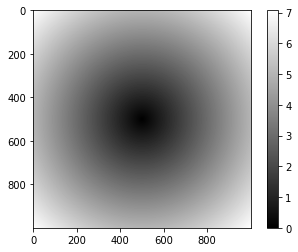

In [311]:
plt.imshow(z,cmap=plt.cm.gray);plt.colorbar()

----

### 将条件逻辑表述为数组运算

numpy.where 函数是三元表达式 x if condition else y 的矢量化版本。假设我们有一个布尔数组和两个值数组：

In [315]:
xarr = np.arange(1.1,1.6,0.1)

In [316]:
xarr

array([1.1, 1.2, 1.3, 1.4, 1.5])

In [317]:
yarr = np.arange(2.1,2.6,0.1)

In [318]:
yarr

array([2.1, 2.2, 2.3, 2.4, 2.5])

In [319]:
cond = np.array([True,False,True,True,False])

假设我们要根据cond种的值选取xarr和yarr的值：当cond中的值为True时，选取xarr的值，否则从yarr中选取。列表推导式应该写为：

In [321]:
result =[(x if c else y)
    for x,y,c in zip(xarr,yarr,cond)]

In [322]:
result

[1.1, 2.2, 1.3000000000000003, 1.4000000000000004, 2.5000000000000004]

缺点在于，处理速度慢，无法用于多维数组。下面使用np.where

In [325]:
result = np.where(cond,xarr,yarr)

In [326]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

在数据分析工作中，where通常用于根据另一个数组而产生一个新的数组。假设有一个随机数据组成的矩阵，我们希望所有的正值替换成2，所有的负值替换成-2。

In [327]:
arr=random.randn(4,4)

In [328]:
arr

array([[-0.19207156,  0.60086302, -1.66246697, -0.27047308],
       [-0.9208546 , -0.800727  , -0.97318649,  0.05096214],
       [ 0.17275676,  0.61291519,  0.64990416, -0.09832714],
       [-0.00184373, -1.73189564,  0.34379764, -0.48637111]])

In [329]:
np.where(arr>0,2,-2)

array([[-2,  2, -2, -2],
       [-2, -2, -2,  2],
       [ 2,  2,  2, -2],
       [-2, -2,  2, -2]])

`下面一个更为复杂的例子

np.where(cond1 & cond2,0,
         np.where(cond1,1,
                  np.where,cond2,2,3))

---

### 数学和统计方法

可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。sum、mean以及标准差std等聚合计算（aggregation，通常叫做约简），即可以当作数组的实例方法调用，也可以当作顶级NumPy函数使用。

In [375]:
arr=np.array([[1,2,3],[4,5,6]])

In [376]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [377]:
arr.mean()

3.5

In [378]:
np.mean(arr)

3.5

In [379]:
arr.sum()

21

In [380]:
np.sum(arr)

21

In [381]:
arr.mean(axis=1)

array([2., 5.])

In [382]:
np.mean(arr[0])

2.0

In [383]:
arr.mean(0)

array([2.5, 3.5, 4.5])

In [384]:
arr.sum(0)

array([5, 7, 9])

mean和sum这类函数可以接受一个axis参数（用于计算该轴向上的统计值），最终结果时一个少一维的数组

axis=1，是对横向向求平均。
axis=0，对所有数据在0轴上操作,竖向

In [359]:
arr.sum(0)

array([ 9, 12, 15])

使用如cumsum和cumprod之类的方法*（所有元素的累计和或积)则不聚合。


In [388]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])

In [9]:
arr

array([-0.03806078,  1.83822166, -0.47233185,  0.0733428 ,  0.71170308,
        1.26062804, -0.26742251, -0.51862666,  0.95697454,  1.03876311,
       -2.09799015, -0.44951331, -0.95774325,  0.28551655, -1.14828363,
        0.19644748, -1.18626357,  3.03357477, -0.19236656, -0.29360321,
       -0.82059541,  0.58395105,  1.00153356,  0.76480776, -1.85020508,
       -0.21208105, -0.94932139, -0.57042622, -0.49672034, -0.67845131,
        0.19042879,  1.75335274, -2.58172151,  1.04426899,  0.14851959,
        1.19323339, -1.74844315,  2.18326552,  2.20301229,  0.63824287,
       -0.68173767, -1.59115622,  1.71303832, -1.41779214, -0.26056584,
       -0.6580992 ,  1.06395648,  0.43566243, -0.86913705,  0.42118091,
        0.8919896 ,  1.20328994,  0.92591103, -0.84813391,  0.06155073,
        1.55094217,  0.15240799,  0.27193601,  0.14337983,  1.28083084,
       -0.47093211,  0.16158089, -0.88504162, -0.19631413, -1.31274393,
       -0.08287302,  0.08738904,  0.3595695 , -0.19321741, -0.97

In [357]:
arr.cumsum(0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [390]:
arr.cumprod(0)

array([[ 0,  1,  2],
       [ 0,  4, 10],
       [ 0, 28, 80]], dtype=int32)

In [391]:
arr.cumprod(1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

----

### 用于布尔型数组的方法

在上面这些方法中，布尔值会被强制转换为1（True）和0（False）。因此sum经常被用来对布尔型数组中的True值计数

In [7]:
import numpy as np

arr = np.random.randn(100)

In [8]:
(arr>0).sum() #正值的数量

52

另外还有两个方法，any和all，它们对于布尔型数组非常有用。any用于测试数组中是否存在一个或多个True，而all则检查数组中所有值是否都是True

In [12]:
bools = np.array([False,False,True,False])

In [13]:
bools.any()

True

In [16]:
bools.all()

False

---

### 排序

跟Python内置的列表类型一样，NumPy数组也可以通过sort方法就地进行排序

In [17]:
arr= np.random.randn(8)

In [18]:
arr

array([-0.88695403, -0.35840818,  0.24593623, -1.50471937,  2.10300811,
       -0.90697732, -0.28878469,  1.24306248])

In [21]:
arr.sort()

In [22]:
arr

array([-1.50471937, -0.90697732, -0.88695403, -0.35840818, -0.28878469,
        0.24593623,  1.24306248,  2.10300811])

In [24]:
arr=np.random.randn(5,3)

In [25]:
arr

array([[-0.1693255 , -0.88807819,  0.5481332 ],
       [-0.12941324,  1.08783463, -1.04207807],
       [-0.14642022,  0.55195504,  0.59383968],
       [-0.0033072 ,  1.36649721, -0.10125711],
       [-0.60291076,  1.02496294, -0.93494894]])

In [26]:
arr.sort(1)

In [27]:
arr

array([[-0.88807819, -0.1693255 ,  0.5481332 ],
       [-1.04207807, -0.12941324,  1.08783463],
       [-0.14642022,  0.55195504,  0.59383968],
       [-0.10125711, -0.0033072 ,  1.36649721],
       [-0.93494894, -0.60291076,  1.02496294]])

In [28]:
arr.sort(0)

In [29]:
arr

array([[-1.04207807, -0.60291076,  0.5481332 ],
       [-0.93494894, -0.1693255 ,  0.59383968],
       [-0.88807819, -0.12941324,  1.02496294],
       [-0.14642022, -0.0033072 ,  1.08783463],
       [-0.10125711,  0.55195504,  1.36649721]])

顶级方法np.sort返回的是数组的已排序副本，而就地排序则会修改数组本身。计算数组分位数最简单的方法就是对其进行排序，然后选取特定位置的值：

In [32]:
large_arr =np.random.randn(1000)

In [33]:
large_arr.sort()

In [35]:
large_arr[int(0.05*len(large_arr))] #5%的分位数

-1.731040785120619

---

### 唯一化以及其他的集合逻辑

NumPy提供了一些针对一维ndarray的基本集合运算。最常用的可能就要数np.unique了，它用于找出数组中的唯一值并返回已排序的结果。

In [38]:
names = np.array(['Bob','Joe','Will','Bob','Joe','Will','Joe'])

In [39]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [40]:
ints = np.array([3,3,3,2,2,1,1,4,4])

In [43]:
np.unique(ints)

array([1, 2, 3, 4])

python纯代码如下：

In [44]:
sorted(set(names))

['Bob', 'Joe', 'Will']

另外一个函数np.in1d用于测试一个数组中的值在另一个数组中的成员资格，返回一个布尔型数组：

In [45]:
values = np.array([6,0,0,3,2,5,6])

In [46]:
np.in1d(values,[2,3,6])

array([ True, False, False,  True,  True, False,  True])

intersect1d(x.y)   |||计算x与y中的公共元素，并返回有序结果

union1d(x,y)  |||计算x与y 的并集，并返回由序结果

setdiff1d(x,y)|||集合的差，即元素在x中且不在y中

setxor1d(x,y)|||集合的对称差，即存在于一个数组中但不同时存在于两个数组中的元素。

----

### 用于数组的文件输入输出

#### 将数组以二进制格式保存到磁盘中

np.save 和np.load是读写磁盘数据组数据的两个主要函数。默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为.npy的文件中的。

In [49]:
arr =np.arange(10)

In [53]:
np.save('some_array',arr)

In [54]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

可以通过np.savez将多个数组保存在一个压缩文件中，并将数组以关键字参数的形式传入即可:

In [63]:
np.savez('arr_achive.npz.npz',a=arr,b=arr)

In [64]:
arch = np.load('arr_achive.npz.npz')

In [66]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

-----

### 获取文本文件

从文件中加载文本是一个非常标准的任务。Python中的文件读写函数的格式容易将新手搞晕，所以主要介绍pandas中的read_csv和read_table函数。有时，我们需要用np.loadtxt或更为专门化的np.genfromtxt将数据加载到Numpy数组中。

以一个简单的逗号分割文件（CSV）为例：

In [70]:
!type array_ex.txt

0.580052,0.186730,1.040717,1.134411
0.194163,-0.636917,-0.938659,0.124094
-0.126410,0.268607,-0.695724,0.047428
-1.484413,0.004176,-0.744203,0.005487
2.302869,0.200131,1.670238,-1.881090
-0.193230,1.047233,0.482803,0.960334


In [71]:
arr = np.loadtxt('array_ex.txt',delimiter = ',')

In [72]:
arr

array([[ 0.580052,  0.18673 ,  1.040717,  1.134411],
       [ 0.194163, -0.636917, -0.938659,  0.124094],
       [-0.12641 ,  0.268607, -0.695724,  0.047428],
       [-1.484413,  0.004176, -0.744203,  0.005487],
       [ 2.302869,  0.200131,  1.670238, -1.88109 ],
       [-0.19323 ,  1.047233,  0.482803,  0.960334]])

np.savetxt执行的是相反的操作，存储。genfromtxt于loadtxt差不多，只不过它面向的是结构化数组和缺失数据处理。

-----

### 线性代数

线性代数（如矩阵乘法，矩阵分解、行列式以及其他方阵数学等）是任何数组库的重要组成部分。numpy提供了一个用于矩阵乘法的dot函数（既是一个数组方法也是numpy命名空间中的一个函数）：

In [74]:
x = np.array([[1.,2.,3.],[4.,5.,6.]])

In [75]:
y = np.array([[6.,23.],[-1.,7,],[8,9]])

In [76]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [77]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [78]:
x.dot(y) #相当于np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

一个二维数组与一个大小合适的一维数组的矩阵点积运算之后会得到一个一维数组：

In [79]:
np.dot(x,np.ones(3))

array([ 6., 15.])

numpy.linalg中有一组标准的矩阵分解运算以及诸如求逆和行列式之类的东西。

In [80]:
from numpy.linalg import inv,qr

In [97]:
X = np.random.randn(5,5)

In [98]:
mat = X.T.dot(X)

In [99]:
X

array([[ 0.3759956 ,  0.38346442,  0.5422929 , -1.04330562,  0.53038198],
       [ 0.10379536,  0.41964772, -0.80389881, -0.08710882, -0.08185409],
       [ 0.52911264, -1.1565617 , -0.41858211,  0.13738341, -1.85634428],
       [ 0.84502936, -1.2663904 , -1.06721468, -2.13620412,  0.18812777],
       [-0.56800689,  0.22509886, -0.06824667, -0.50247078,  0.47539007]])

In [100]:
mat

array([[ 1.46881279, -1.62220776, -0.96408147, -1.84837684, -0.90234136],
       [-1.62220776,  3.31519828,  1.69085996,  1.99664481,  2.18477599],
       [-0.96408147,  1.69085996,  2.25915066,  1.76082357,  0.89724079],
       [-1.84837684,  1.99664481,  1.76082357,  5.9307937 , -1.44200013],
       [-0.90234136,  2.18477599,  0.89724079, -1.44200013,  3.99540699]])

In [101]:
inv(mat)

array([[ 2.5883441 ,  0.06663273, -0.16404413,  1.06898124,  0.97077732],
       [ 0.06663273,  1.48564957, -0.15455925, -0.67846013, -1.00749405],
       [-0.16404413, -0.15455925,  0.82280374, -0.30338585, -0.24680388],
       [ 1.06898124, -0.67846013, -0.30338585,  1.08053688,  1.07053271],
       [ 0.97077732, -1.00749405, -0.24680388,  1.07053271,  1.46224706]])

In [106]:
a=mat.dot(inv(mat))

In [103]:
q,r =qr(mat)

In [104]:
r

array([[-3.15422558,  4.7722498 ,  3.29756682,  5.48871175,  2.11602039],
       [ 0.        , -1.57053285, -0.46390663,  3.1245648 , -3.80481603],
       [ 0.        ,  0.        , -1.30713678, -1.25110922,  0.84610943],
       [ 0.        ,  0.        ,  0.        , -2.51060336,  2.13927378],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.43426689]])

----

### 随机数生成

numpy.random模块对python内置的random进行了补充，增加了一些用于搞笑生成多种概率分布的样本值的函数，比如我们可以用normal来得到一个标准正态分布的数组：

In [110]:
samples = np.random.normal(size=(4,4))

In [111]:
samples

array([[-0.7536623 ,  1.71178349, -1.17329479, -1.07338758],
       [ 0.86313026,  0.46843282, -1.10480852, -0.17064227],
       [ 0.71352454, -1.16407337,  1.85349648, -0.18254836],
       [ 1.23718343, -0.39479053, -0.88942999,  0.33951195]])

#### 范例：随机漫步

In [6]:
import random
import matplotlib.pyplot as plt

In [130]:
position = 0

In [131]:
walk = [position]

In [132]:
steps=1000

In [139]:
for i in np.arange(steps):
    step =1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

In [32]:
nsteps = 1000

In [33]:
draws = np.random.randint(0,2,size=nsteps)

In [39]:
steps = np.where(draws>0,1,-1)

In [36]:
walk = steps.cumsum()

In [37]:
walk.min()

-21

In [38]:
walk.max()

38

In [27]:
walk

array([ -1,   0,  -1,  -2,  -3,  -2,  -3,  -2,  -1,  -2,  -1,   0,  -1,
        -2,  -1,   0,   1,   2,   1,   0,  -1,  -2,  -3,  -4,  -3,  -2,
        -3,  -4,  -3,  -4,  -3,  -2,  -3,  -2,  -1,   0,  -1,   0,   1,
         0,   1,   2,   1,   2,   3,   2,   3,   2,   3,   2,   1,   2,
         1,   0,  -1,  -2,  -1,   0,  -1,  -2,  -3,  -2,  -1,  -2,  -1,
        -2,  -1,  -2,  -3,  -2,  -1,  -2,  -3,  -4,  -3,  -2,  -3,  -4,
        -5,  -6,  -5,  -6,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
         2,   1,   2,   1,   2,   1,   0,  -1,  -2,  -3,  -2,  -3,  -2,
        -3,  -2,  -3,  -2,  -3,  -2,  -1,  -2,  -3,  -4,  -5,  -4,  -5,
        -4,  -3,  -2,  -1,  -2,  -3,  -2,  -3,  -2,  -1,   0,  -1,  -2,
        -1,   0,   1,   2,   1,   0,   1,   2,   3,   4,   3,   4,   3,
         4,   5,   6,   5,   6,   5,   6,   7,   6,   5,   6,   7,   8,
         7,   6,   7,   6,   7,   8,   7,   8,   7,   8,   7,   8,   9,
         8,   9,   8,   7,   6,   7,   8,   9,  10,   9,  10,   

In [16]:
(np.abs(walk) >=10).argmax()

177

In [17]:
walk[91]

2

In [26]:
import numpy as np
x=np.arange(1,1001)
x

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

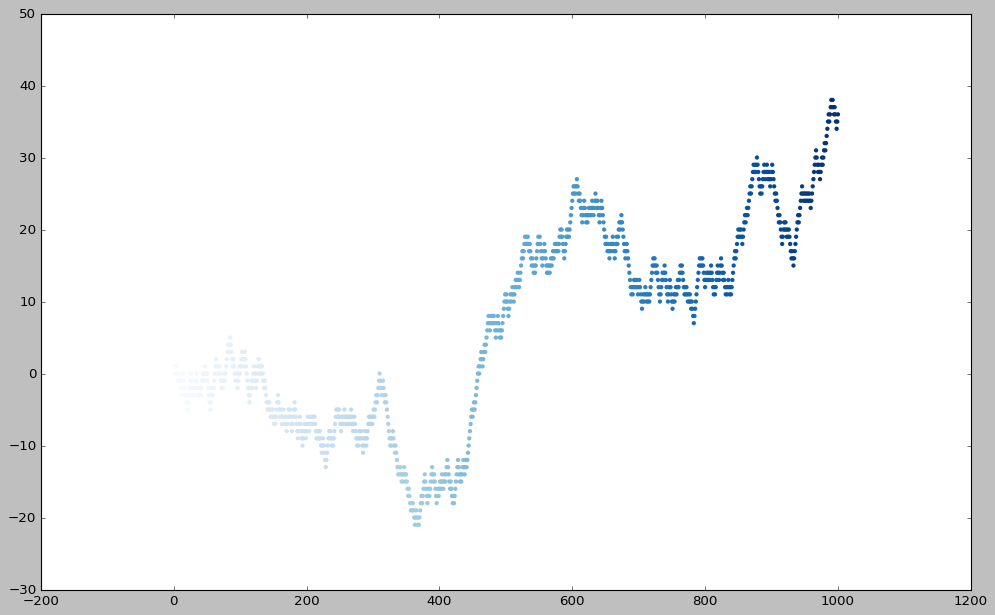

In [42]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,9))
plt.style.use('classic')
point_numbers =range(1000)
ax.scatter(x,walk,s=15,c=point_numbers,cmap=plt.cm.Blues,edgecolors='none')


-------

##  随机漫步实例，使用matplotlib

In [170]:
from random import choice
class RandomWalk:
    def __init__(self,num_point= 5000):
        self.num_point=num_point
        
        self.x_values=[0]
        self.y_values=[0]
        
    def fill_walk(self):
        while len(self.x_values)<self.num_point:
            x_direction=choice([1,-1])
            x_distance = choice([0,1,2,3,4])
            x_step = x_distance*x_direction
            
            y_direction=choice([1,-1])
            y_distance = choice([0,1,2,3,4])
            y_step = y_distance*y_direction
            
            if x_step ==0 and y_step==0:
                continue
            
            x=self.x_values[-1] + x_step
            y=self.y_values[-1] + y_step
            
            self.x_values.append(x)
            self.y_values.append(y)

In [171]:
import matplotlib.pyplot as plt

In [188]:
rw = RandomWalk(10090)
rw.fill_walk()

In [186]:
plt.style.use('classic')


<function matplotlib.pyplot.show(close=None, block=None)>

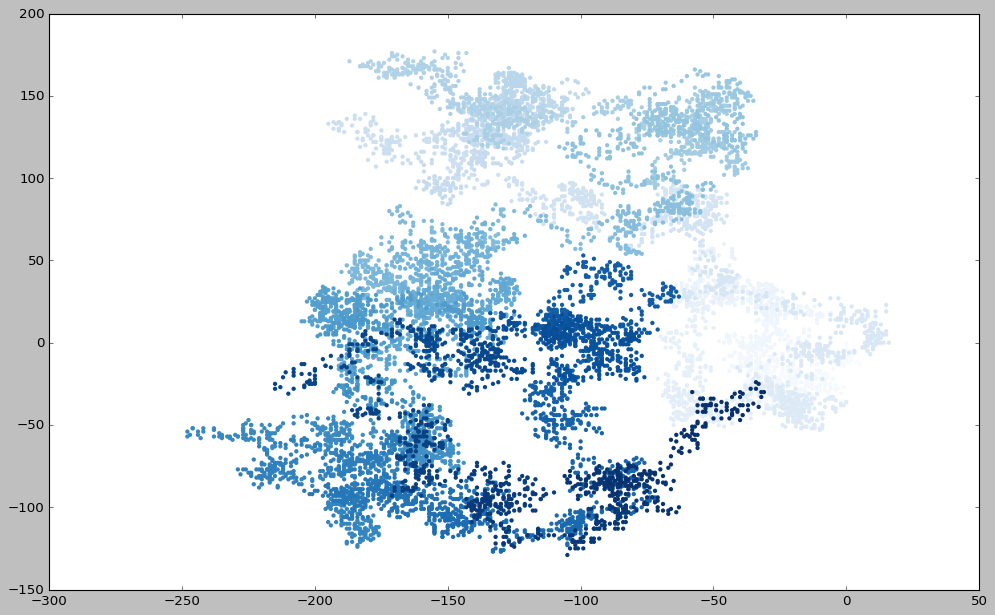

In [190]:
fig, ax = plt.subplots(figsize=(15,9))
point_numbers =range(rw.num_point)
ax.scatter(rw.x_values,rw.y_values,s=15,c=point_numbers,cmap=plt.cm.Blues,edgecolors='none')
plt.show